# ![](../graphics/stat_ai_logo.png)
***

# Biomedical Data Analysis with Pandas
In this module, you will learn about one of the most popular and useful Python libraries for data analysis and manipulation: ***pandas***!

<img src='../graphics/pandas_logo.png' alt='The Pandas logo' align='center' width=200>

### After this module, students will be able to:
* Explain the various components of a *pandas* dataframe.
* Use read_csv() to create new dataframes from real-world patient data.
* Slice and dice data with *pandas* index and dataframe management functions.
* Illustrate the appropriate use of basic statistical functions to summarize a clinical dataset.
* Use matplotlib functions to generate clear graphs and plots.

While pandas is widely used across many domains, in this lesson we'll be exploring *pandas* in the context of **healthcare data**.

# ![](../graphics/get_started_icon.png)

Like we learned last module, before we can use pandas, we must **import** the pandas library.
* For illustration purposes, we'll also import the scientific computing library NumPy.
* Both NumPy and pandas are usually imported with abbreviated aliases, `np` and `pd`.

In [1]:
import numpy as np
import pandas as pd

## Pandas Dataframes

*pandas* provides one of the most useful data structures for managing data: the dataframe.

**Dataframes..**
* allow fast, flexible, and efficient data manipulation.
* are the natural data structure for **tabular** data.
* are two-dimensional, containing both **rows** and **columns**.
* consist of one or more **Series** (column)


***pandas*** is built on top of the **NumPy** library, which in practice means that most of the methods defined for NumPy Arrays apply to *pandas* Series/DataFrames.

**What makes Pandas so attractive?**
1. Powerful and efficient interface to access and manipulate individual records.
2. Proper handling of missing values.
3. Relational database-style operations between DataFrames.

## Creating a Series

Let's start by creating our first *pandas* Series! (Remember: in the context of a **DataFrame** (table), each column is represented by a **Series**).

First, let's create some sample data to illustrate the creation of our Series.

In [2]:
spo2 = [88, 99, 88, 85, 100, 98] # Review: this is a Python list, containing 6 values.
risk = ['high', 'low', 'high', 'high', 'low', 'low']

In [3]:
# Create our first series
spo2_series = pd.Series(spo2)
spo2_series # If a variable name is the last line in a code cell, Jupyter will display the contents of the variable.

0     88
1     99
2     88
3     85
4    100
5     98
dtype: int64

In [4]:
# Do the same for risk
pd.Series(risk) # Display the 'risk' series

0    high
1     low
2    high
3    high
4     low
5     low
dtype: object

## Creating a Pandas Dataframe

* Now that we've seen a Series, we can look at how these are combined as **columns** in a **table**.
* By popular convention, we will name our DataFrame variable `df`.

#### ![](../graphics/example_icon.png)
Create a small DataFrame from our sample data.

In [5]:
df = pd.DataFrame({'spo2': spo2, 'risk': risk}) # Create the DataFrame
df # View the DataFrame

,spo2,risk
0,88,high
1,99,low
2,88,high
3,85,high
4,100,low
5,98,low


#### ![](../graphics/example_icon.png)
Create a larger DataFrame from random data.

In [6]:
# Make some random numbers for data. 
# This makes an array of random integers from 1-10, then reshapes it into a 500x4 matrix (500 rows and 4 columns)
random_data = np.random.randint(1,10, size=2000).reshape(500, 4)

# Create some example column names
column_names = ['columnA', 'columnB', 'columnC', 'columnD']

# Create the DataFrame from the random data we generated.
# Since the input matrix has 500 rows and 4 columns, the DataFrame will have 500 rows and 4 columns
df = pd.DataFrame(data=random_data, columns=column_names)
df # View the dataframe

,columnA,columnB,columnC,columnD
0,3,6,7,5
1,6,8,5,3
2,8,6,8,6
3,6,1,4,1
4,2,6,2,5
...,...,...,...,...
495,5,2,9,1
496,6,1,8,4
497,2,4,1,6
498,1,6,9,1


#### ![](../graphics/note_icon.png)
> When viewing a large DataFrame in a Jupyter notebook, sometimes the data will be **truncated** as above.

# Creating a DataFrame from an existing data file

* Instead of creating a DataFrame from scratch (tedious!), usually we create a DataFrame by loading an existing data file.
* The most common file format for storing datasets is the **comma-separated value** `(.csv)` file.

> To create a pandas DataFrame from a `.csv` file, we'll use the `read_csv` function.

### Let's load some real-world patient data from an electronic health record (EHR) system!
The main input argument to `read_csv` function can be a local filename, or a remote URL of a file stored on the web. In this example, we'll be using an online file.

In [7]:
url='https://www.dropbox.com/s/ncss9nypanxi2ak/temperature.csv?dl=1'
df = pd.read_csv(url) # Create the DataFrame from the given URL
df # View the DataFrame we just created

,patient,time,temp_source,temp_value,temp_unit
0,1,2043-10-29 05:45:10,Oral,97.9,Farenheit
1,2,1983-11-04 17:12:26,Oral,97.6,Farenheit
2,2,2003-01-15 20:35:43,Oral,94.5,Farenheit
3,2,2013-02-21 19:12:46,Oral,97.0,Farenheit
4,3,2007-12-21 02:21:30,Oral,97.5,Farenheit
...,...,...,...,...,...
1995,998,2012-12-08 15:09:54,Oral,96.9,Farenheit
1996,998,2023-11-23 06:21:52,Oral,93.6,Farenheit
1997,998,2062-06-26 06:41:23,Oral,98.3,Farenheit
1998,999,1996-03-11 09:43:05,Oral,98.8,Farenheit


We can see that this dataset contains 2000 rows and 5 columns corresponding to patient temperature measurements from an EHR system.   

Below is a more detailed description of each column:

| Column |  Description |
| --- | --- |
|  patient |   unique patient identifier |
|  time |   the date and time of temperature measurement |
|  temp_source |   the temperature acquisition method |
|  temp_value |   the measured temperature value |
|  temp_unit |   the temperature measurement unit |

## Viewing Parts of a Dataframe
* DataFrames often hold a large number of rows (in many AI projects, you might be dealing with hundreds of thousands, or even millions, of samples!)
* Sometimes we just want to get a preview, or a sense of what data is being stored in our DataFrame.
* In the below examples, we'll see a few ways to view parts of a DataFrame
    * This includes viewing a subset of columns, or a subset of rows, or both.

Let's start by viewing only some of a DataFrame's **rows**. Since pandas is so flexible, there are several ways to accomplish this. In the examples below, we will use the pandas functions `head` and `tail`.

#### ![](../graphics/exercise_icon.png)

Use `head` to view the first 5 rows of our `df` DataFrame. (**Hint:** Given a dataframe `X`, calling `X.head()` will show the first `5` rows of the DataFrame.  

In [8]:
# Call df.head()


#### ![](../graphics/exercise_icon.png)
Use `head` to view the first **10** rows of `df`. (**Hint:** You can also provide an input argument `n` to the `head` function to show the first `n` rows (instead of the default `5` rows).

In [9]:
# Call df.head(10)


#### ![](../graphics/exercise_icon.png)
Use `tail` to view the **last** 5 rows of our `df` DataFrame. (**Hint:** Given a dataframe `X`, calling `X.tail()` will show the **last** `5` rows of the DataFrame.  

In [10]:
# Call df.tail()


#### ![](../graphics/exercise_icon.png)
Use `tail` to view the **last** `10` rows of `df`. (**Hint:** You can also provide an input argument `n` to the `tail` function to show the last `n` rows (instead of the default `5` rows).

In [11]:
# Call df.tail(10)


Now, let's see some ways to view a subset of a DataFrame's **columns**. 

**Reminder:** If the last line inside a code cell is simply a variable name, Jupyter will display the value of that variable.

For a given DataFrame `df` and desired column `col`, one way to view a single column is to call `df['col']`. (**Important:** the column name `col` must be in quotes!).

#### ![](../graphics/exercise_icon.png)
Use the above method to view the `temp_value` column of our `df` DataFrame.

In [12]:
# Call df['temp_value']


We can also adapt this method to view multiple columns. Instead of passing in a single string column name `'C'`, instead we will pass in a **list** of string column names, e.g. `['A', 'B', 'C']`. For example: `df[['A', 'B', 'C']]` (**Important:** Notice the double brackets!)

#### ![](../graphics/exercise_icon.png)
Use the above method to view the `temp_value` **and** `temp_unit` columns of our `df` DataFrame.

In [13]:
# Call df[['temp_value', 'temp_unit']]


> These methods can also be combined!

In [14]:
df[['time', 'temp_value']].head(2)

,time,temp_value
0,2043-10-29 05:45:10,97.9
1,1983-11-04 17:12:26,97.6


## Creating new columns 

* We can easily create new columns in an existing DataFrame.
* When we define an equation as below, equation will be applied to every **row** of the DataFrame.
* In this way, we can create new columns from different combinations of existing columns.

Let's use an equation to convert Fahrenheit temperature to Celsius, and assign these values to a new column called `temp_celsius`.

In [15]:
df['temp_celsius'] = (df['temp_value'] - 32) * (5/9)
df.head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,2043-10-29 05:45:10,Oral,97.9,Farenheit,36.611111
1,2,1983-11-04 17:12:26,Oral,97.6,Farenheit,36.444444
2,2,2003-01-15 20:35:43,Oral,94.5,Farenheit,34.722222
3,2,2013-02-21 19:12:46,Oral,97.0,Farenheit,36.111111
4,3,2007-12-21 02:21:30,Oral,97.5,Farenheit,36.388889


## Deleting columns 

We can also **drop** (delete) columns.

Let's remove the `temp_celsius` column that we previously created.

In [16]:
df.drop(columns=['temp_celsius']) # Will this remove the column?
df.head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,2043-10-29 05:45:10,Oral,97.9,Farenheit,36.611111
1,2,1983-11-04 17:12:26,Oral,97.6,Farenheit,36.444444
2,2,2003-01-15 20:35:43,Oral,94.5,Farenheit,34.722222
3,2,2013-02-21 19:12:46,Oral,97.0,Farenheit,36.111111
4,3,2007-12-21 02:21:30,Oral,97.5,Farenheit,36.388889


**What happened? `temp_celsius` is still there!**

#### ![](../graphics/tip_icon.png)
> Unless you specify `inplace=True</code>` or assign the dataframe back to itself (or a different variable name), **the `drop` method does not change the original DataFrame!**

Below is one way to permanently remove a column from a DataFrame by assigning the result to a new DataFrame variable `df2`.

In [17]:
# Now, after dropping the column, we are assigning the resulting DataFrame to a new variable.
# This will persist the change.
df2 = df.drop(columns=['temp_celsius']) 
df2.head()

,patient,time,temp_source,temp_value,temp_unit
0,1,2043-10-29 05:45:10,Oral,97.9,Farenheit
1,2,1983-11-04 17:12:26,Oral,97.6,Farenheit
2,2,2003-01-15 20:35:43,Oral,94.5,Farenheit
3,2,2013-02-21 19:12:46,Oral,97.0,Farenheit
4,3,2007-12-21 02:21:30,Oral,97.5,Farenheit


#### ![](../graphics/exercise_icon.png)

Create a new DataFrame called `df3`, that contains everything in the `df` DataFrame **except** the `temp_source` column.

In [18]:
# Code it!


## Descriptive Statistics

#### ![](../graphics/alert_icon.png)
> Before diving into an AI project, it is critical to become familiar with the data you will be modeling!  Pandas has a large collection of optimized methods designed to analyze your data.

A preliminary data discovery and exploration phase can help you better understand the data you will be modeling, and has many downstream advantages:
* You may identify potential problems with the dataset (e.g., missing values, outliers, incomplete columns, irrelevant information)
* Results of data exploration may help you decide which preproessing or modeling approach to take.
* A better understanding of your population will help you interpret your future results.

#### Remember Python functions?
Pandas offers many **functions** that take as **input** a set of values (example: all of the values from the `temp_celsius` column), and **return** a calculated **output** value based on which function was used.

Here are a few examples (most are self-explanatory!):
* `sum` (sum the input values)
* `count` (count the number of input values), `value_counts` (count the number of each unique value)
* `min` (return the minimum value), `max` (return the maximum value)
* `mean` (return the mean value), `median` (median), `mode` (mode)
* `var` (variance), `std` (standard deviation)
* `quantile` (compute quantiles)

Let's take a look at a few examples using our clinical dataset!

#### ![](../graphics/example_icon.png)
Here's how we can compute the **mean** patient temperature, measured in Fahrenheit (i.e., the `temp_value` of our `df` DataFrame):

In [19]:
# Compute the mean temperature (Fahrenheit)
df['temp_value'].mean()

97.4448

It's that easy! Let's compute a few more descriptive statistics:

#### ![](../graphics/exercise_icon.png) 
Compute the **minimum** Fahrenheit temperature (`temp_value`).

In [20]:
# Compute the minimum temperature (Fahrenheit)


#### ![](../graphics/exercise_icon.png)
Compute the **maximum** Fahrenheit temperature (`temp_value`).

In [21]:
# Compute the maximum temperature (Fahrenheit)


#### ![](../graphics/exercise_icon.png)
Count the number of occurrences of **each unique** temperature acquisition method (excluding missing values).  
* **Hint 1:** The `temp_source` column contains the temperature acquisition method.
* **Hint 2:** The `value_counts` function can be used to calculate counts of each unique value (excluding missing values)

In [22]:
# Code it!


Finally, the `describe` function can be used on an entire DataFrame to display several common statistics, computed for each column, all at once. (**Note:** Be aware of the values and data types contained in each column, as sometimes the statistics will not make sense. For example, `patient` is a randomized patient identifier, so calculations with these values will be meaningless.)

In [23]:
# (Almost) everything, (almost) everywhere, all at once
# Note: will only compute statistics for columns with numerical data.
df.describe()

,patient,temp_value,temp_celsius
count,2000.000000,2000.000000,2000.000000
mean,499.017000,97.444800,36.358222
std,289.878512,1.376775,0.764875
min,1.000000,89.500000,31.944444
25%,250.000000,96.600000,35.888889
50%,510.500000,97.400000,36.333333
75%,747.250000,98.300000,36.833333
max,999.000000,103.300000,39.611111


## Filtering data
Pandas makes it easy to select, analyze, and process subsets of your data based on some criteria `C`. This is accomplished with easily understandable syntax: `df[C]` will return a subset of DataFrame `df` that **matches** the criteria `C` listed inside brackets `[]`.

### Comparing values
In pandas, we can create filtering criteria using familiar mathematical operators to compare values:
* `>`: greater than
* `<`: less than
* `>=`: greater than or equal to
* `<=`: less than or equal to
* `!=`: is not equal to
* `==`: is equal to a single value
* **Bonus:** `.isin(L)`: is equal to any value contained in the list `L`.

#### ![](../graphics/example_icon.png)
Display readings where temperature is **greater** than 102$^{\circ} F$.
* In this example, the criteria `C` is `df['temp_value'] > 102`.
* Recall the Pandas filtering syntax: `df[C]`.
* So, this is what we want: `df[df['temp_value'] > 102]`.

In [24]:
# Select rows where Fahrenheit temperature is greater than 102 degrees.
df[df['temp_value'] > 102]

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
36,18,2041-05-30 20:14:08,Oral,103.1,Farenheit,39.500000
559,277,2017-10-23 22:22:33,Tympanic,102.6,Farenheit,39.222222
880,453,2015-03-22 04:38:05,Oral,102.2,Farenheit,39.000000
1216,613,2026-06-29 17:47:42,Oral,102.7,Farenheit,39.277778
1406,704,2074-05-02 05:48:09,Oral,103.3,Farenheit,39.611111


#### ![](../graphics/exercise_icon.png)
Display readings where temperature is less than 94$^{\circ} F$.

In [25]:
# Display rows where measured Fahrenheit temperature is less than 94 degrees.


#### ![](../graphics/example_icon.png)
Display the first 5 readings where the temperature acquisition method (`temp_source`) is `Core`.

* Recall that the symbol `==` will check for equality (we want the source to be equal to the single value `Core`).
* In this example, the criteria `C` is `df['temp_value'] == 'Core'`.
* Given the Pandas filtering syntax: `df[C]`, this is what we want: `df[df['temp_source'] == 'Core']`.

In [26]:
# Show the first 5 core temperature measurements.
df[df['temp_source'] == 'Core'].head()

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
13,7,2043-10-27 11:28:15,Core,96.6,Farenheit,35.888889
25,12,1952-06-18 10:03:43,Core,98.8,Farenheit,37.111111
28,12,2026-04-01 16:41:53,Core,97.8,Farenheit,36.555556
38,19,1959-07-19 09:30:06,Core,98.0,Farenheit,36.666667
49,22,2009-01-26 13:24:06,Core,98.1,Farenheit,36.722222


#### ![](../graphics/exercise_icon.png)
Display the first 5 readings where the temperature acquisition method (`temp_source`) is `Tympanic`.

In [27]:
# Show the first 5 tympanic (ear) temperature measurements.


### Combining multiple criteria

Multiple criteria can be combined using either the `&` or `|` symbols:
* C1 `&` C2: This will select rows that match **both** criteria C1 **and** C2.
* C1 `&` C2: This will select rows that match **either** criteria C1 **or** C2.

#### ![](../graphics/example_icon.png)
Display readings where temperature is between 99$^{\circ} F$ and 100$^{\circ} F$. In this example, we have two criteria:
* C1: `df['temp_value'] >= 99`
* C2: `df['temp_value'] <= 100`

In [28]:
# Select rows where the Fahrenheit temperature is between 99 and 100 degrees.
df[(df['temp_value'] >= 99) & (df['temp_value'] <= 100)]

,patient,time,temp_source,temp_value,temp_unit,temp_celsius
15,8,1935-12-01 02:45:08,Oral,99.4,Farenheit,37.444444
35,18,2037-10-05 08:41:47,Oral,99.0,Farenheit,37.222222
54,24,2032-10-05 02:26:00,Tympanic,99.3,Farenheit,37.388889
65,27,2068-07-17 17:50:40,Tympanic,100.0,Farenheit,37.777778
68,28,2000-01-25 04:59:18,Oral,99.8,Farenheit,37.666667
...,...,...,...,...,...,...
1942,967,2040-03-06 19:38:21,Temporal,99.9,Farenheit,37.722222
1959,977,1966-12-02 11:09:03,Oral,99.8,Farenheit,37.666667
1977,989,2025-03-16 12:10:39,Core,99.3,Farenheit,37.388889
1988,994,2024-04-24 16:00:26,Oral,99.7,Farenheit,37.611111


#### ![](../graphics/exercise_icon.png)
Display all `Core` temperatures that are greater than 100$^{\circ} F$. (**Hint:** we have 2 criteria.)

In [29]:
# Display all rows with core temperature greater than 100 degrees F.


### Analyzing filtered data
We can also perform our descriptive statistics on a filtered subset!

In [30]:
df[(df['temp_source'] == 'Core') & (df['temp_value'] > 100)].describe()

,patient,temp_value,temp_celsius
count,10.000000,10.000000,10.000000
mean,432.300000,100.500000,38.055556
std,342.254632,0.547723,0.304290
min,41.000000,100.100000,37.833333
25%,151.000000,100.125000,37.847222
50%,357.000000,100.200000,37.888889
75%,714.250000,100.850000,38.250000
max,970.000000,101.700000,38.722222


## Data visualization
Let's conclude this lesson by learning how Pandas can enhance our understanding of a dataset with its many built-in visualization tools.

In the next module, we'll be building a machine learning prediction model using a real-world patient dataset. We will use this dataset to demonstrate methods for data visualization in Pandas.

Let's see the data! This time, we'll be loading our dataset into a DataFrame variable named `X`.

In [31]:
X = pd.read_csv('https://www.dropbox.com/s/ol9cs1sjsr2yhal/data_small.csv?dl=1')
X.head()

,patient_id,sex,ethnicity,race,language,marital_status,age,bmi,admission_source,emergent,...,valve,coag,obese,wghtloss,lytes,anemia,alc_drug,depress,egfr,aki_surg_disch
0,4757,FEMALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,43.3690,40.6750,TRANSFER,NON-EMERGENCY,...,0,1,1,1,0,0,0,0,62.8876,0
1,2656,FEMALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,41.7882,51.3062,NON-TRANSFER,NON-EMERGENCY,...,0,0,0,0,0,0,0,0,81.3574,1
2,9944,FEMALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,35.8761,26.2132,NON-TRANSFER,NON-EMERGENCY,...,0,0,1,0,0,0,0,0,90.1036,0
3,2065,FEMALE,NON-HISPANIC,AA,ENGLISH,DIVORCED,81.8270,35.5527,NON-TRANSFER,NON-EMERGENCY,...,1,0,1,0,0,0,0,0,28.6199,1
4,1589,FEMALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,73.6769,39.5073,NON-TRANSFER,NON-EMERGENCY,...,0,0,0,0,0,1,0,1,NaN,0


#### ![](../graphics/example_icon.png)
Let's visually examine the distribution of patient age with the pandas `hist` (histogram) function.

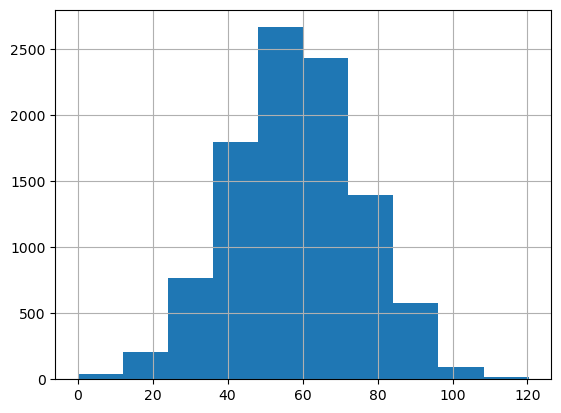

In [32]:
hist = X['age'].hist()

We can modify many parameters of the `hist` function to create a more informative figure.

<Axes: title={'center': 'Distribution of Patient Age'}, xlabel='Age', ylabel='Count'>

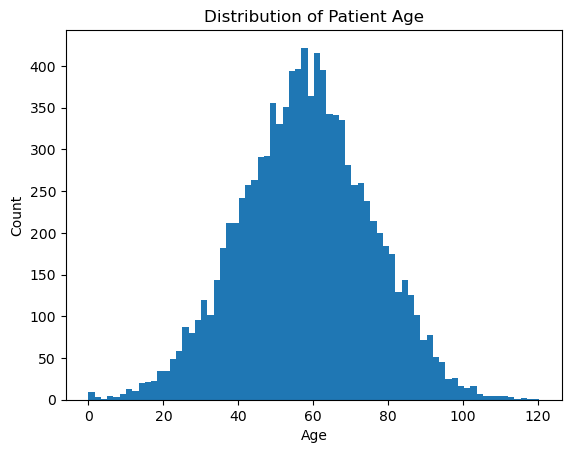

In [33]:
hist = X['age'].hist(bins=72, grid=False)
hist.set_title('Distribution of Patient Age')
hist.set_ylabel('Count')
hist.set_xlabel('Age')
display(hist)

#### ![](../graphics/exercise_icon.png) 
Visualize the distribution of the body mass index (`bmi`) column. Feel free to first filter out unrealistic BMI values and to experiment with the `bins` parameter of the `hist` function.

#### ![](../graphics/example_icon.png)
We can use the `df.plot.box` function to create box plots from columns in our DataFrame:

age    Axes(0.125,0.11;0.775x0.77)
dtype: object

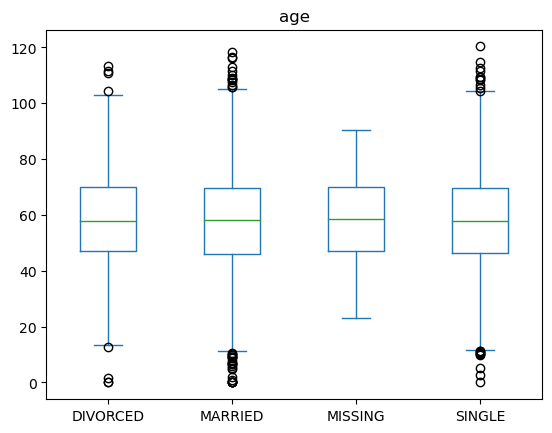

In [34]:
X.plot.box(column='age', by='marital_status')

#### ![](../graphics/exercise_icon.png)
Practice with the `hist` and `box` functions by exploring different columns in our DataFrame. Experiment with data filtering methods to further refine your figures. **Hint:** We can see all of the available columns with `print(X.columns)`.

In [35]:
### Experiment with code!


***
#### Attribution 
Content in this learning experience was adapted from the University of Florida [Practicum AI](https://practicumai.org) "Introduction to Python" course.